In [32]:
#import 
import pandas as pd
import os
from scipy.misc import *
from matplotlib.pyplot import imread
# im = imread(image.png)
import cv2
from PIL import *

from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import accuracy_score , recall_score, confusion_matrix

In [33]:
dataset=pd.read_excel("./../../CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/EvaluationSet/NaturalBlurSet.xlsx")

In [35]:
dataset.head()

,Image Name,Blur Label
0,Original_1,-1
1,Original_2,-1
2,Original_3,-1
3,Original_4,1
4,Original_5,1


In [36]:
dataset.columns

Index(['Image Name', 'Blur Label'], dtype='object')

In [39]:
dataset["Blur Label"].value_counts()

-1    589
 1    411
Name: Blur Label, dtype: int64

In [40]:
dataset[dataset["Blur Label"]==-1]

,Image Name,Blur Label
0,Original_1,-1
1,Original_2,-1
2,Original_3,-1
6,Original_7,-1
7,Original_8,-1
...,...,...
994,Original_995,-1
995,Original_996,-1
996,Original_997,-1
997,Original_998,-1


In [41]:
## get the variance usig laplacian method
def variance_of_laplacian(image):
   
    return cv2.Laplacian(image, cv2.CV_64F).var()

In [42]:
# loop over the input images
def blur_notblur(imagePath):  # our classification method
   
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = variance_of_laplacian(gray)
    text = -1
 
    if fm < 40:
        text = 1
    return text

In [22]:
from scipy.misc import imresize

temp_pred=[]
temp_orig=[]
for index, row in dataset.iterrows():
    img_name=row["Image Name"]+'.jpg'  ## get the images names from dataset
    img_path=os.path.join('./../../CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/EvaluationSet/NaturalBlurSet',img_name)
    temp_pred.append(blur_notblur(img_path))  # predicted result
    temp_orig.append(row["Blur Label"])  ## original result

import numpy as np

y_pred=np.stack(temp_pred)
y_true=np.stack(temp_orig)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true,y_pred)

0.765

In [28]:
fpr, tpr, threshold=roc_curve(y_true,y_pred)
roc_auc = metrics.auc(fpr, tpr)

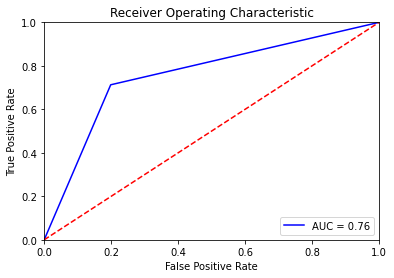

In [31]:

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()